In [12]:
#All code from stech
import pandas as pd
import re
import string
import nltk
import numpy as np
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()

warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',100)
data = pd.read_csv('comments', sep='\t', header = None)
data.columns = ['label','msg']
data.head()

,0
0,me wage watina deyak ratata labadun harshada Silva mathithumani oba thumata vijayakgrahanayak la...
1,Oba thamayi niyama nayakaya daksayi.parinathyi
2,Api pinkrala nha obavgenayakyekugen sewayalabanna gunagaruk budimat naykaykek obatuma ape minisu...
3,Oba parliament ekata awasyama mohothai me. Chanda laksa 2.5 k ho dunna minissu wenuwen Enna plz
4,"Garu nayakatumani., obatumanta jayama wewa!! Jaya Niyati. Ape petuma !!"
...,...
100,mewani sewayak karana obathuma aniwarayenama jaya gannawa ekanthayi
101,pakshayee yahapata wenuwen hemadaamath kepawena naayakayaa obai obata jaya niyathai api obath sa...
102,pakshaya sha janathaawa rakina naayakayata jayen jayama wewa
103,obathuma hamadamath hitiye rata wenuwen hari thana


In [2]:
#clean text
def clean_text(text):
    text = "".join([c for c in text.lower() if c not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([word for word in tokens]) #bigram use krana nisa join kale
    return text
data['msg_clean'] = data['msg'].apply(lambda x: clean_text(x)) # sentense ekak krana eka
data.head()

,label,msg,msg_clean
0,positive,me wage watina deyak ratata labadun harshada Silva mathithumani oba thumata vijayakgrahanayak la...,me wage watina deyak ratata labadun harshada silva mathithumani oba thumata vijayakgrahanayak la...
1,negative,VIP ratha walata janathawa me dakwana wiodaya anduwa kerehi uu yanatha wirodaya saha tharahawa s...,vip ratha walata janathawa me dakwana wiodaya anduwa kerehi uu yanatha wirodaya saha tharahawa s...
2,positive,Api pinkrala nha obavgenayakyekugen sewayalabanna gunagaruk budimat naykaykek obatuma ape minisu...,api pinkrala nha obavgenayakyekugen sewayalabanna gunagaruk budimat naykaykek obatuma ape minisu...
3,positive,janatawa wenuwen wadak karanna puluwan ekama nayakaya obai,janatawa wenuwen wadak karanna puluwan ekama nayakaya obai
4,positive,podi minihage duka hadunana ekama nayakaya obathuma pamanai,podi minihage duka hadunana ekama nayakaya obathuma pamanai


In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
data["label"] = data["label"].map({"negative": 0, "positive": 1})
data.tail()

,label,msg,msg_clean
95,0,rajapaksha paul anduwa me raten nathi wenakal kawadawath me rata diunu wenne na,rajapaksha paul anduwa me raten nathi wenakal kawadawath me rata diunu wenne na
96,1,Covid 19 Uwadura Ape Mathrubhumiyen Thurankara Genime Obathumanlage Meheyum Athi Sarthaka Wewaiy...,covid 19 uwadura ape mathrubhumiyen thurankara genime obathumanlage meheyum athi sarthaka wewaiy...
97,0,Anthimata kujitha wenakan hitiya gedara yanna...thanhaya jayathi soko sir.mulu pakshyakma goda g...,anthimata kujitha wenakan hitiya gedara yannathanhaya jayathi soko sirmulu pakshyakma goda ganna...
98,1,sthuthi sir obata dergayuwewa.budusaranai obata jayakma.wewa,sthuthi sir obata dergayuwewabudusaranai obata jayakmawewa
99,1,mewa tamayi niyama vada loketama vasangatayak vela tiydeddi paksha vipaksha pilbedila araya kara...,mewa tamayi niyama vada loketama vasangatayak vela tiydeddi paksha vipaksha pilbedila araya kara...


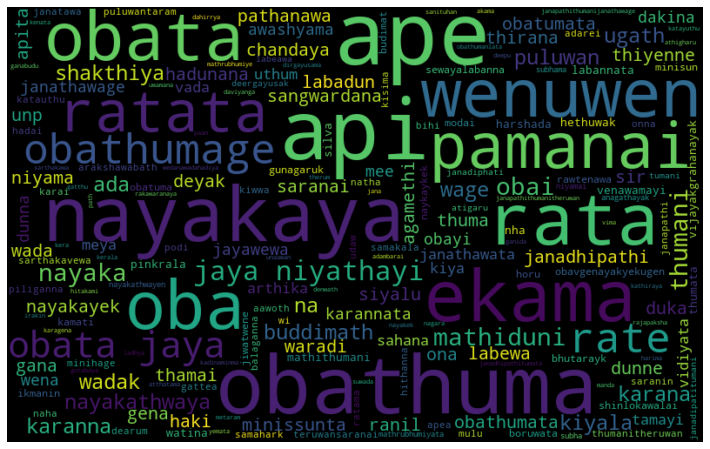

In [5]:
#Exploratory data analysis

#visualize the positive frequent words

all_words = " ".join([sentence for sentence in data['msg_clean'][data['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

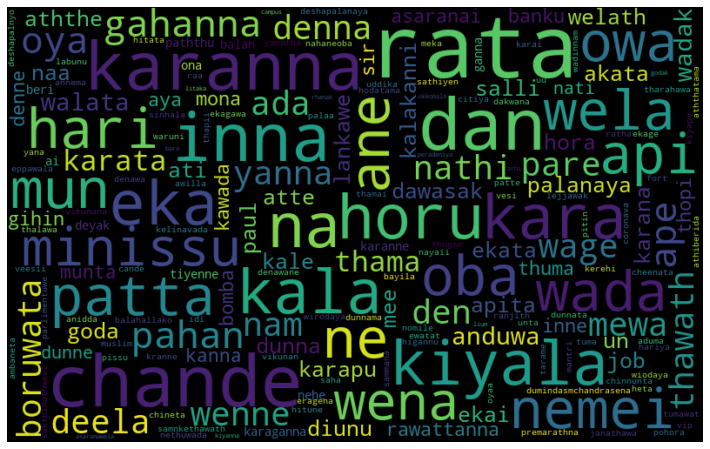

In [6]:
#Exploratory data analysis

#visualize the negative frequent words

all_words = " ".join([sentence for sentence in data['msg_clean'][data['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
#Count vectorization - matrix ekak widiyata enne

from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(ngram_range=(2,2)) # clean text function eka gaththa
#cv1 = CountVectorizer(max_df=0.9, min_df=2, max_features=10000)
x = cv1.fit_transform(data['msg_clean'])
print(x.shape) # (5572,8713) mehema awoth 5572 k msg thiyna rows thiynawa. 813 k unique tokens thiynawa

(100, 1241)


In [8]:
print(cv1.get_feature_names())

['19 uwadura', '225 ekata', '2k welath', '3n veni', '69 ladhya', 'aai balayata', 'aasiyaawema nomatha', 'aawoth puluwantaram', 'action ekak', 'ada mae', 'ada mulu', 'ada nidahase', 'ada thibunanam', 'ada unbala', 'ada weradi', 'adambarai ape', 'adaraneeya nayakayaneni', 'adaraya karana', 'adare 225', 'adarei janadiphati', 'adhare karana', 'adinna epa', 'aduma tarame', 'aduwa apita', 'aemathi thumani', 'agamata awankawa', 'agamethi thumani', 'agamethi wena', 'agaya ape', 'agostu obata', 'ahana prashneta', 'ai ada', 'ai eka', 'akama nayakaya', 'akata apidanne', 'akata bara', 'ake chandeyak', 'akka api', 'alla gaththa', 'allala ellala', 'alluwanam iwarainahama', 'alluwe nhe', 'amathaka kala', 'ambaneta thapii', 'anagatha kabinat', 'anagathayak api', 'anathawa wenuwen', 'andagena yanawaa', 'andanawa aurudu', 'andu awath', 'anduwa kerehi', 'anduwa me', 'ane palayan', 'ane samawenna', 'ane wadinnam', 'ane yannawa', 'anidda fort', 'anithimeta horu', 'annema meka', 'anthima kala', 'anthimai ka

In [9]:
x[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,data['label'], test_size = 0.2,random_state = 42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score # mectric that use

In [12]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.4615384615384615

In [14]:
accuracy_score(y_test,pred)

0.65

In [15]:
#use probability to get output

pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)
f1_score(y_test, pred)

0.6666666666666666

In [16]:
accuracy_score(y_test,pred)

0.5

In [18]:
review = 'obathuma fail na malli'
commenttype = model.predict(cv1.transform([review]))[0]
if commenttype==1:
    print('Positive Comment')
else:
     print('Negative Comment')

Negative Comment
